In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [293]:
encounters = pd.read_csv('encounters.csv')
encounters.head()

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,1018.02,0.00,NaN,NaN
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,2619.36,0.00,NaN,NaN
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03T14:32:11Z,2011-01-03T14:47:11Z,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,461.59,305.27,NaN,NaN
3,c3f4da61-e4b4-21d5-587a-fbc89943bc19,2011-01-03T16:24:45Z,2011-01-03T16:39:45Z,3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,1784.24,0.00,NaN,NaN
4,a9183b4f-2572-72ea-54c2-b3cd038b4be7,2011-01-03T17:36:53Z,2011-01-03T17:51:53Z,fa006887-d93c-d302-8b89-f3c25f88c0e1,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,ambulatory,390906007,Follow-up encounter,85.55,234.72,0.00,55822004.0,Hyperlipidemia


In [294]:
organizations = pd.read_csv('organizations.csv')
organizations

,Id,NAME,ADDRESS,CITY,STATE,ZIP,LAT,LON
0,d78e84ec-30aa-3bba-a33a-f29a3a454662,MASSACHUSETTS GENERAL HOSPITAL,55 FRUIT STREET,BOSTON,MA,2114,42.362813,-71.069187


In [295]:
encounters['ORGANIZATION'].value_counts()

,count
ORGANIZATION,
d78e84ec-30aa-3bba-a33a-f29a3a454662,27891


In [296]:
patients = pd.read_csv('patients.csv')
patients.head()

,Id,BIRTHDATE,DEATHDATE,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
0,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,nonhispanic,F,Wakefield Massachusetts US,510 Little Station Unit 69,Quincy,Massachusetts,Norfolk County,2186.0,42.290937,-70.975503
1,6e5ae27c-8038-7988-e2c0-25a103f01bfa,1940-02-19,NaN,Mr.,Zane918,Hodkiewicz467,NaN,NaN,M,white,nonhispanic,M,Brookline Massachusetts US,747 Conn Throughway,Boston,Massachusetts,Suffolk County,2135.0,42.308831,-71.063162
2,8123d076-0886-9007-e956-d5864aa121a7,1958-06-04,NaN,Mr.,Quinn173,Marquardt819,NaN,NaN,M,white,nonhispanic,M,Gardner Massachusetts US,816 Okuneva Extension Apt 91,Quincy,Massachusetts,Norfolk County,2170.0,42.265177,-70.967085
3,770518e4-6133-648e-60c9-071eb2f0e2ce,1928-12-25,2017-09-29,Mr.,Abel832,Smitham825,NaN,NaN,M,white,hispanic,M,Randolph Massachusetts US,127 Cole Way Unit 95,Boston,Massachusetts,Suffolk County,2118.0,42.334304,-71.066801
4,f96addf5-81b9-0aab-7855-d208d3d352c5,1928-12-25,2014-02-23,Mr.,Edwin773,Labadie908,NaN,NaN,M,white,hispanic,M,Stow Massachusetts US,976 Ziemann Gateway,Boston,Massachusetts,Suffolk County,2125.0,42.346771,-71.058813


In [297]:
payers = pd.read_csv('payers.csv')
payers.head()

,Id,NAME,ADDRESS,CITY,STATE_HEADQUARTERED,ZIP,PHONE
0,b3221cfc-24fb-339e-823d-bc4136cbc4ed,Dual Eligible,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323
1,7caa7254-5050-3b5e-9eae-bd5ea30e809c,Medicare,7500 Security Blvd,Baltimore,MD,21244.0,1-800-633-4227
2,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Medicaid,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323
3,d47b3510-2895-3b70-9897-342d681c769d,Humana,500 West Main St,Louisville,KY,40018.0,1-844-330-7799
4,6e2f1a2d-27bd-3701-8d08-dae202c58632,Blue Cross Blue Shield,Michigan Plaza,Chicago,IL,60007.0,1-800-262-2583


In [298]:
procedures = pd.read_csv('procedures.csv')
procedures.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,32c84703-2481-49cd-d571-3899d5820253,265764009,Renal dialysis (procedure),903,NaN,NaN
1,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,d9ec2e44-32e9-9148-179a-1653348cc4e2,c98059da-320a-c0a6-fced-c8815f3e3f39,76601001,Intramuscular injection,2477,NaN,NaN
2,2011-01-04T14:49:55Z,2011-01-04T15:04:55Z,d856d6e6-4c98-e7a2-129b-44076c63d008,2cfd4ddd-ad13-fe1e-528b-15051cea2ec3,703423002,Combined chemotherapy and radiation therapy (p...,11620,363406005.0,Malignant tumor of colon
3,2011-01-05T04:02:09Z,2011-01-05T04:17:09Z,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,17966936-0878-f4db-128b-a43ae10d0878,173160006,Diagnostic fiberoptic bronchoscopy (procedure),9796,162573006.0,Suspected lung cancer (situation)
4,2011-01-05T12:58:36Z,2011-01-05T16:42:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,9de5f0b0-4ba4-ce6f-45fb-b55c202f31a5,265764009,Renal dialysis (procedure),1255,NaN,NaN


In [299]:
encounters.isnull().sum(), organizations.isnull().sum(), patients.isnull().sum(), payers.isnull().sum(), procedures.isnull().sum()

(Id                         0
 START                      0
 STOP                       0
 PATIENT                    0
 ORGANIZATION               0
 PAYER                      0
 ENCOUNTERCLASS             0
 CODE                       0
 DESCRIPTION                0
 BASE_ENCOUNTER_COST        0
 TOTAL_CLAIM_COST           0
 PAYER_COVERAGE             0
 REASONCODE             19541
 REASONDESCRIPTION      19541
 dtype: int64,
 Id         0
 NAME       0
 ADDRESS    0
 CITY       0
 STATE      0
 ZIP        0
 LAT        0
 LON        0
 dtype: int64,
 Id              0
 BIRTHDATE       0
 DEATHDATE     820
 PREFIX          0
 FIRST           0
 LAST            0
 SUFFIX        953
 MAIDEN        588
 MARITAL         1
 RACE            0
 ETHNICITY       0
 GENDER          0
 BIRTHPLACE      0
 ADDRESS         0
 CITY            0
 STATE           0
 COUNTY          0
 ZIP           142
 LAT             0
 LON             0
 dtype: int64,
 Id                     0
 NAME            

In [300]:
encounters.columns, patients.columns, payers.columns, procedures.columns

(Index(['Id', 'START', 'STOP', 'PATIENT', 'ORGANIZATION', 'PAYER',
        'ENCOUNTERCLASS', 'CODE', 'DESCRIPTION', 'BASE_ENCOUNTER_COST',
        'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE',
        'REASONDESCRIPTION'],
       dtype='object'),
 Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'PREFIX', 'FIRST', 'LAST', 'SUFFIX',
        'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE',
        'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'ZIP', 'LAT', 'LON'],
       dtype='object'),
 Index(['Id', 'NAME', 'ADDRESS', 'CITY', 'STATE_HEADQUARTERED', 'ZIP', 'PHONE'], dtype='object'),
 Index(['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION',
        'BASE_COST', 'REASONCODE', 'REASONDESCRIPTION'],
       dtype='object'))

In [301]:
#patients['SUFFIX'].fillna('')
patients[patients['MAIDEN'].isna() & (patients['MARITAL']=='M') ]


,Id,BIRTHDATE,DEATHDATE,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
1,6e5ae27c-8038-7988-e2c0-25a103f01bfa,1940-02-19,NaN,Mr.,Zane918,Hodkiewicz467,NaN,NaN,M,white,nonhispanic,M,Brookline Massachusetts US,747 Conn Throughway,Boston,Massachusetts,Suffolk County,2135.0,42.308831,-71.063162
2,8123d076-0886-9007-e956-d5864aa121a7,1958-06-04,NaN,Mr.,Quinn173,Marquardt819,NaN,NaN,M,white,nonhispanic,M,Gardner Massachusetts US,816 Okuneva Extension Apt 91,Quincy,Massachusetts,Norfolk County,2170.0,42.265177,-70.967085
3,770518e4-6133-648e-60c9-071eb2f0e2ce,1928-12-25,2017-09-29,Mr.,Abel832,Smitham825,NaN,NaN,M,white,hispanic,M,Randolph Massachusetts US,127 Cole Way Unit 95,Boston,Massachusetts,Suffolk County,2118.0,42.334304,-71.066801
4,f96addf5-81b9-0aab-7855-d208d3d352c5,1928-12-25,2014-02-23,Mr.,Edwin773,Labadie908,NaN,NaN,M,white,hispanic,M,Stow Massachusetts US,976 Ziemann Gateway,Boston,Massachusetts,Suffolk County,2125.0,42.346771,-71.058813
5,8e9650d1-788a-78f9-4a28-d08f7f95354a,1928-12-25,NaN,Mr.,Frankie174,Oberbrunner298,NaN,NaN,M,white,hispanic,M,Boston Massachusetts US,303 Bechtelar Bypass Suite 26,Boston,Massachusetts,Suffolk County,2467.0,42.371026,-71.118107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,77dedc66-369c-bb18-940d-0db841255ef7,1954-05-01,NaN,Mr.,Jos√© Luis472,Varela93,NaN,NaN,M,black,hispanic,M,Wesley Saint Andrew Parish DM,1098 Terry Loaf Apt 10,Boston,Massachusetts,Suffolk County,2132.0,42.318772,-71.007855
962,9f064bb4-42f4-fbf6-34ea-2b4cefd8023b,1988-09-12,NaN,Mr.,Leonardo412,Kautzer186,NaN,NaN,M,white,nonhispanic,M,Charlton Massachusetts US,913 Padberg Mews Suite 95,Quincy,Massachusetts,Norfolk County,NaN,42.276677,-70.987193
964,c06513da-7f35-b4eb-5bab-28c87ff97a10,1959-03-04,2014-11-16,Mr.,Tomas436,Hermann103,NaN,NaN,M,asian,nonhispanic,M,Worcester Massachusetts US,754 Pfannerstill Park,Medford,Massachusetts,Middlesex County,2155.0,42.416156,-71.125391
966,a2b011b1-ca0a-69fa-6906-6c06ad18376a,1944-06-22,NaN,Mr.,Gerald181,Murray856,NaN,NaN,M,white,nonhispanic,M,Chelmsford Massachusetts US,952 Wyman Frontage road Suite 59,Boston,Massachusetts,Suffolk County,2136.0,42.336430,-71.056928


In [302]:
encounters.isnull().sum(), organizations.isnull().sum(), patients.isnull().sum(), payers.isnull().sum(), procedures.isnull().sum()

(Id                         0
 START                      0
 STOP                       0
 PATIENT                    0
 ORGANIZATION               0
 PAYER                      0
 ENCOUNTERCLASS             0
 CODE                       0
 DESCRIPTION                0
 BASE_ENCOUNTER_COST        0
 TOTAL_CLAIM_COST           0
 PAYER_COVERAGE             0
 REASONCODE             19541
 REASONDESCRIPTION      19541
 dtype: int64,
 Id         0
 NAME       0
 ADDRESS    0
 CITY       0
 STATE      0
 ZIP        0
 LAT        0
 LON        0
 dtype: int64,
 Id              0
 BIRTHDATE       0
 DEATHDATE     820
 PREFIX          0
 FIRST           0
 LAST            0
 SUFFIX        953
 MAIDEN        588
 MARITAL         1
 RACE            0
 ETHNICITY       0
 GENDER          0
 BIRTHPLACE      0
 ADDRESS         0
 CITY            0
 STATE           0
 COUNTY          0
 ZIP           142
 LAT             0
 LON             0
 dtype: int64,
 Id                     0
 NAME            

In [303]:
encounters[encounters['REASONCODE'].isna() & encounters['REASONDESCRIPTION'].isna()]

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,1018.02,0.00,NaN,NaN
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,2619.36,0.00,NaN,NaN
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03T14:32:11Z,2011-01-03T14:47:11Z,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,461.59,305.27,NaN,NaN
3,c3f4da61-e4b4-21d5-587a-fbc89943bc19,2011-01-03T16:24:45Z,2011-01-03T16:39:45Z,3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,1784.24,0.00,NaN,NaN
5,c4923a74-3e40-8b0c-cf73-05b9c0390621,2011-01-03T19:08:16Z,2011-01-03T19:23:16Z,823c6b40-9dbe-e463-310b-ea2b23b23b48,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),136.80,1183.25,946.58,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27884,2de8a9d4-48a6-af90-bfad-2c7acd523054,2022-01-28T23:41:33Z,2022-01-28T23:56:33Z,12e05e42-1c47-1284-9c84-b1c242839fc3,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,urgentcare,702927004,Urgent care clinic (procedure),142.58,142.58,82.06,NaN,NaN
27885,95c24a94-6659-9ed2-55a0-53fed6d890ac,2022-01-29T06:19:36Z,2022-01-29T07:19:36Z,b17ffd11-c8c2-28aa-0c26-8ddc6bc5957d,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,emergency,50849002,Emergency Encounter,146.18,146.18,84.94,NaN,NaN
27886,917bb534-2ed3-e1f5-ac27-74f314d19c63,2022-01-29T11:42:06Z,2022-01-29T11:57:06Z,0c122290-8c15-77ac-b418-2fea4e8a8e6a,d78e84ec-30aa-3bba-a33a-f29a3a454662,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,outpatient,185349003,Encounter for check up (procedure),85.55,85.55,24.27,NaN,NaN
27887,07710480-9d6b-9c9b-87c3-c1d54df4069d,2022-01-29T20:12:53Z,2022-01-29T20:27:53Z,20a4bc24-6b69-2f5c-dc74-1df390cae25b,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,urgentcare,702927004,Urgent care clinic (procedure),142.58,10588.34,8438.67,NaN,NaN


In [304]:
encounters.fillna({'REASONCODE':0,'REASONDESCRIPTION':''}, inplace=True)

In [305]:
patients.columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'PREFIX', 'FIRST', 'LAST', 'SUFFIX',
       'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE',
       'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'ZIP', 'LAT', 'LON'],
      dtype='object')

In [306]:
patients.drop(['PREFIX', 'FIRST', 'LAST', 'SUFFIX',
       'MAIDEN', 'ZIP' ], axis=1, inplace=True)

In [307]:
patients.isna().sum()

,0
Id,0
BIRTHDATE,0
DEATHDATE,820
MARITAL,1
RACE,0
ETHNICITY,0
GENDER,0
BIRTHPLACE,0
ADDRESS,0
CITY,0


In [308]:
patients['Alive'] = patients['DEATHDATE'].isna()

In [309]:
patients = patients[patients['MARITAL'].isna()==False]

In [310]:
patients.isna().sum()

,0
Id,0
BIRTHDATE,0
DEATHDATE,820
MARITAL,0
RACE,0
ETHNICITY,0
GENDER,0
BIRTHPLACE,0
ADDRESS,0
CITY,0


In [311]:
procedures.isna().sum()

,0
START,0
STOP,0
PATIENT,0
ENCOUNTER,0
CODE,0
DESCRIPTION,0
BASE_COST,0
REASONCODE,36945
REASONDESCRIPTION,36945


In [312]:
len(procedures[procedures['REASONCODE'].isna() & procedures['REASONDESCRIPTION'].isna()])

36945

In [313]:
len(procedures)

47701

In [314]:
procedures.fillna({'REASONCODE':0,'REASONDESCRIPTION':''}, inplace=True)

###Analysis

####How many patients have been admitted or readmitted over time?

In [315]:
encounters.columns

Index(['Id', 'START', 'STOP', 'PATIENT', 'ORGANIZATION', 'PAYER',
       'ENCOUNTERCLASS', 'CODE', 'DESCRIPTION', 'BASE_ENCOUNTER_COST',
       'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE',
       'REASONDESCRIPTION'],
      dtype='object')

In [316]:
encounters['START'] = pd.to_datetime(encounters['START'])

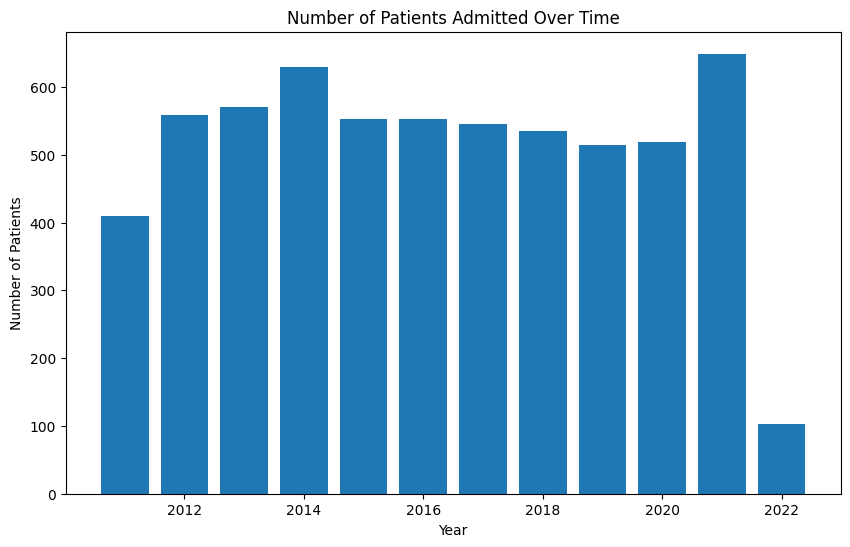

In [317]:
admitted = encounters.groupby(encounters['START'].dt.year)['PATIENT'].nunique()

plt.figure(figsize=(10,6))
plt.bar(admitted.index, admitted.values)
plt.xlabel('Year')
plt.ylabel('Number of Patients')
plt.title('Number of Patients Admitted Over Time')
plt.show()

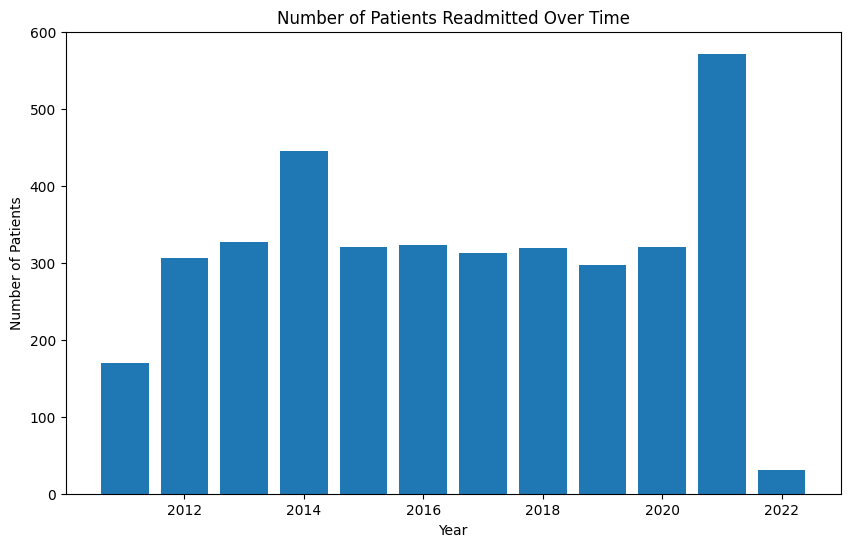

In [318]:
readmitted = encounters.groupby(encounters['START'].dt.year)['PATIENT'].value_counts()
readmitted = readmitted[readmitted > 1]
readmitted = readmitted.index.get_level_values(0).value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(readmitted.index, readmitted.values)
plt.xlabel('Year')
plt.ylabel('Number of Patients')
plt.title('Number of Patients Readmitted Over Time')
plt.show()

####How long are patients staying in the hospital, on average?

Average Length of Stay: 435.96 minutes


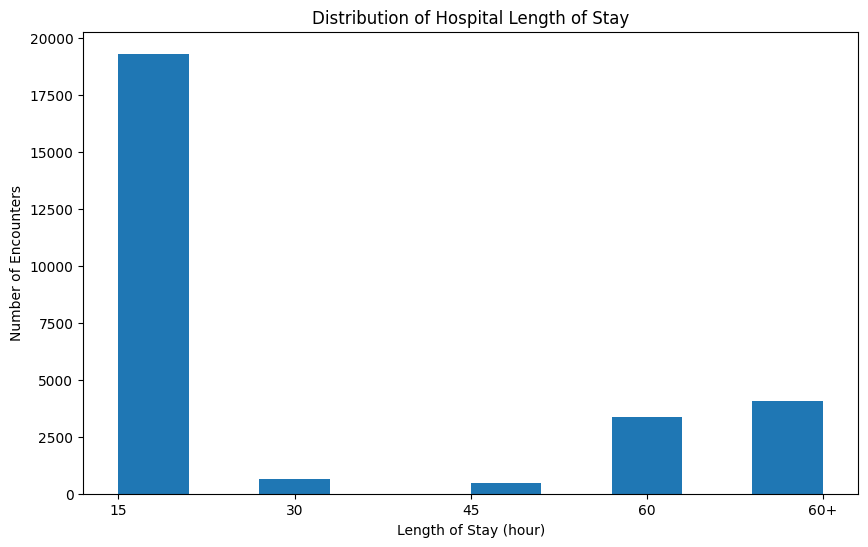

In [319]:
encounters['START'] = pd.to_datetime(encounters['START'])
encounters['STOP'] = pd.to_datetime(encounters['STOP'])

encounters['Range'] = ((encounters['STOP'] - encounters['START']).dt.total_seconds() /60).round(2)
average_stay = encounters['Range'].mean()
print(f"Average Length of Stay: {average_stay:.2f} minutes")

encounters['Range_C'] = pd.cut(encounters['Range'], bins=[ 0, 15, 30, 45, 60, np.inf], labels=[ '15', '30', '45', '60', '60+'])

# Histogram to show distribution of LOS
plt.figure(figsize=(10, 6))
plt.hist(encounters['Range_C'].sort_values())
plt.xlabel('Length of Stay (hour)')
plt.ylabel('Number of Encounters')
plt.title('Distribution of Hospital Length of Stay')
plt.show()

####How much is the average cost per visit?

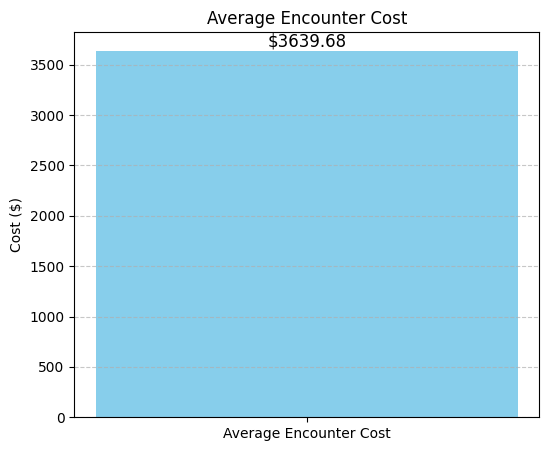

In [320]:
average_encounter_cost = encounters['TOTAL_CLAIM_COST'].mean()

plt.figure(figsize=(6, 5))
plt.bar(['Average Encounter Cost'], [average_encounter_cost], color='skyblue')

# Annotate the exact value
plt.text(0, average_encounter_cost, f'${average_encounter_cost:.2f}', ha='center', va='bottom', fontsize=12)

plt.ylabel('Cost ($)')
plt.title('Average Encounter Cost')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

####How many procedures are covered by insurance?

In [321]:
encounters_procedures = pd.merge(encounters, procedures, left_on='Id', right_on='ENCOUNTER', how='inner',suffixes=('_encounters', '_procedures'))
encounters_procedures.columns

Index(['Id', 'START_encounters', 'STOP_encounters', 'PATIENT_encounters',
       'ORGANIZATION', 'PAYER', 'ENCOUNTERCLASS', 'CODE_encounters',
       'DESCRIPTION_encounters', 'BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST',
       'PAYER_COVERAGE', 'REASONCODE_encounters',
       'REASONDESCRIPTION_encounters', 'Range', 'Range_C', 'START_procedures',
       'STOP_procedures', 'PATIENT_procedures', 'ENCOUNTER', 'CODE_procedures',
       'DESCRIPTION_procedures', 'BASE_COST', 'REASONCODE_procedures',
       'REASONDESCRIPTION_procedures'],
      dtype='object')

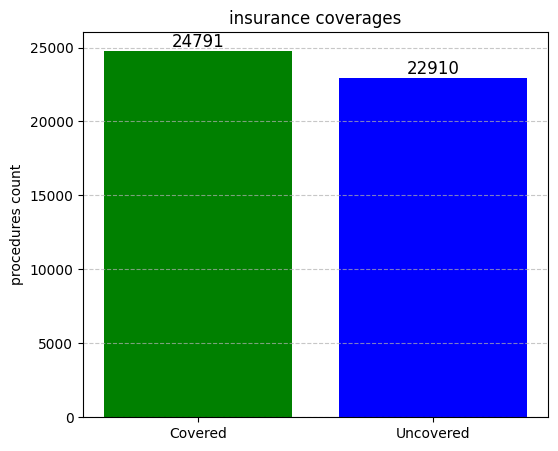

In [322]:
covered_encounters_procedures = encounters_procedures[encounters_procedures['PAYER_COVERAGE']>0][[
    'Id',
    'ENCOUNTERCLASS',
    'BASE_ENCOUNTER_COST',
    'TOTAL_CLAIM_COST',
    'PAYER_COVERAGE',
    'CODE_procedures',
    'DESCRIPTION_procedures',
    'BASE_COST']]

covered_procedures_count = covered_encounters_procedures.shape[0]
uncovered_procedures_count = procedures.shape[0] - covered_procedures_count

plt.figure(figsize=(6, 5))
plt.bar(['Covered', 'Uncovered'], [covered_procedures_count, uncovered_procedures_count], color=['green', 'blue'])

# Annotate the exact value
plt.text(0, covered_procedures_count, covered_procedures_count, ha='center', va='bottom', fontsize=12)
plt.text(1, uncovered_procedures_count, uncovered_procedures_count, ha='center', va='bottom', fontsize=12)

plt.ylabel('procedures count')
plt.title('insurance coverages')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
